<a href="https://colab.research.google.com/github/srilamaiti/spring_2023_w266_final_project_heesuk_iris_srila/blob/main/srila/roberta_ell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing new libraries**

In [1]:
!pip install nltk
!pip install wordcloud
!pip install transformers
!pip install emoji==0.6.0
!pip3 install tokenizers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49732 sha256=8a335669153e35c15fe0ff192fe98e7c5933643a9802e68e9c58f0ceedaa1f2b
  Stored in directory: /root/.cache/pip/wheels/70/2a/7f/1a0012c86b1061c6ee2ed9568b1f830f857a51e8

In [2]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 5.8 MB/s eta 0:00:00


In [3]:
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing libraries**

In [4]:
import transformers
print(f'transformers version: {transformers.__version__}')
from transformers import logging as hf_logging
from transformers import BertTokenizer, TFBertModel
from transformers import TFAutoModel, AutoTokenizer
hf_logging.set_verbosity_error()
import nltk
from nltk.tokenize import sent_tokenize
import spacy      
from spacy import displacy
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from transformers import RobertaTokenizer, TFRobertaModel
nltk.download('punkt')
ROBERTA_MODEL = "roberta-base"

# Other required libraries
import math
import os
import pandas as pd
import numpy as np
import re
import copy
import sys
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# distances
from scipy.spatial.distance import pdist, squareform

# data visualization
from matplotlib import cm
import matplotlib.pyplot as plt
from IPython.display import Image

# others
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
from scipy.cluster.hierarchy import linkage

import warnings
warnings.filterwarnings("ignore")

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.layer_utils import count_params
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import mae
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from keras.models import load_model

import torch
import torch
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup

transformers version: 4.27.3


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **General functions**

## **Rounding Off to Custom Decimal Places**

In [34]:
def roundPartial(value, resolution):
    return round (value / resolution) * resolution

## **Set parameters**

In [35]:
def set_config_param(seed = 99):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_columns', None)
    
    
set_config_param(20230214)

## **Plot loss and accuracy**

In [36]:
def plot_loss_accuracy(history, col_list):
    fig, ax = plt.subplots(2, 6, figsize=(16, 6), sharex='col', sharey='row')
    fig.tight_layout(pad=5.0)
    for idx, col in enumerate(col_list):

        ax[0, idx].plot(history[col + '_loss'], lw=2, color='darkgoldenrod')
        ax[0, idx].plot(history['val_' + col + '_loss'], lw=2, color='indianred')
        #ax[0, idx].legend(loc='center left')
        ax[0, idx].legend(['Train', 'Validation'], fontsize=5)
        ax[0, idx].set_xlabel('Epochs', size=10)
        ax[0, idx].set_title('Loss: ' + col)

        ax[1, idx].plot(history[col + '_accuracy'], lw=2, color='darkgoldenrod')
        ax[1, idx].plot(history['val_' + col + '_accuracy'], lw=2, color='indianred')
        #ax[0, idx].legend(loc='center left')
        ax[1, idx].legend(['Train', 'Validation'], fontsize=5)
        ax[1, idx].set_xlabel('Epochs', size=10)
        ax[1, idx].set_title('Accuracy: ' + col)

## **Plot Loss and other KPI specified**

In [148]:
def custom_plot(df, kpi_name, kpi_string):
    x_arr = np.arange(len(df['loss'])) + 1
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, df['loss'], '-o', label = 'Train loss')
    ax.plot(x_arr, df['val_loss'], '--<', label = 'Validation loss')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size = 15)
    ax.set_ylabel('Loss', size = 15)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, df[kpi_name], '-o', label = 'Train ' + kpi_string)
    ax.plot(x_arr, df['val_' + kpi_name], '--<', label = 'Validation ' + kpi_string)
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size = 15)
    ax.set_ylabel('Accuracy', size = 15)
    ax.set_ylim(0,1)
    plt.show()

## **Text Encode**

In [37]:
def text_encode(texts, tokenizer, max_len):
    input_ids = []
    # token_type_ids = []
    attention_mask = []
    
    for text in texts:
        token = tokenizer(text, 
                          max_length = max_len, 
                          truncation = True, 
                          padding = 'max_length',
                          add_special_tokens = True)
        input_ids.append(token['input_ids'])
        # token_type_ids.append(token['token_type_ids'])
        attention_mask.append(token['attention_mask'])
    
    return np.array(input_ids), np.array(attention_mask)

## **Busild Base Model**

In [38]:
def build_base_model(model_layer, learning_rate, dense_dim = 6):
    
    #define inputs
    input_ids = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'input_ids')
    attention_masks = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'attention_masks')
    
    #insert BERT layer
    transformer_layer = model_layer([input_ids, attention_masks])
    
    #choose only last hidden-state
    x = transformer_layer[1]
    output = tf.keras.layers.Dense(dense_dim)(x)
    #output = tf.keras.layers.Rescaling(scale=4.0, offset=1.0)(x)
    model = tf.keras.models.Model(inputs = [input_ids, attention_masks], outputs = output)

    model.compile(tf.keras.optimizers.Adam(learning_rate), loss = loss,metrics = metrics)
    
    return model

## **Custom metric**

In [39]:
def MCRMSE(y_true, y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis = 1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis = -1, keepdims = True).numpy()[0]

# **Read input files**

In [91]:
input_train_df = pd.read_csv('train.csv')
input_test_df = pd.read_csv('test.csv')
# Cleaning up full_text : Removing tabl and carriage return characters
input_train_df['full_text'] = input_train_df["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex = True)
input_test_df['full_text'] = input_test_df["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex = True)

label_cols = input_train_df.columns[2:]
orig_train_df = copy.deepcopy(input_train_df)
orig_train_df.head()

text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
1  0022683E9EA5  When a problem is a change you have to let it ...       2.5   
2  00299B378633  Dear, Principal  If u change the school policy...       3.0   
3  003885A45F42  The best time in life is when you become yours...       4.5   
4  0049B1DF5CCC  Small act of kindness can impact in other peop...       2.5   

   syntax  vocabulary  phraseology  grammar  conventions  
0     3.5         3.0          3.0      4.0          3.0  
1     2.5         3.0          2.0      2.0          2.5  
2     3.5         3.0          3.0      3.0          2.5  
3     4.5         4.5          4.5      4.0          5.0  
4     3.0         3.0          3.0      2.5          2.5

# **Model building**

In [41]:
set_config_param()

number_of_splits = 5
random_state = 2023
MAX_LEN = 512
epochs = 5
batch_size = 4
learning_rate = 1e-5
validation_split = .2
dropout = .1
number_of_hidden_layer = 1
hidden_layer_node_count = 64
trainable_flag = False
retrain_layer_count = 0

Original test data is very limited, there are only 3 records and it does not have labels to test. So we decided to repurpose the given train data to split into train, test and validation sets.

In [42]:
shuffle = np.random.permutation(np.arange(orig_train_df.shape[0]))
orig_train_df = orig_train_df.iloc[shuffle]
split=(0.8, 0.2)
splits = np.multiply(len(orig_train_df), split).astype(int)
df_train, df_test = orig_train_df[ : splits[0]], orig_train_df[splits[0] : ]

label_cols = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
y_train = np.array(df_train[label_cols], dtype = "float32")
y_test = np.array(df_test[label_cols], dtype = "float32")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_ids[0][0]',              
 el)                            thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

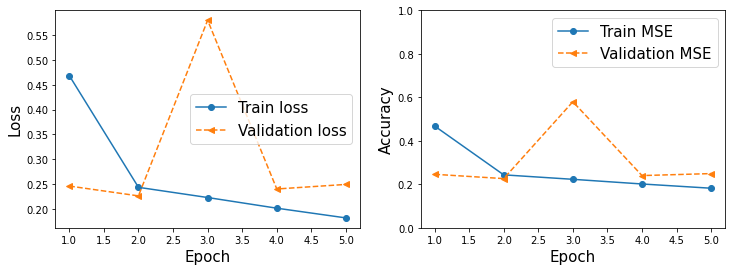

In [12]:
roberta_tokenizer = RobertaTokenizer.from_pretrained(ROBERTA_MODEL)
roberta_model = TFRobertaModel.from_pretrained(ROBERTA_MODEL)

train_input_ids, train_attention_masks = text_encode(df_train['full_text'], roberta_tokenizer, MAX_LEN)
test_input_ids, test_attention_masks = text_encode(df_test['full_text'], roberta_tokenizer, MAX_LEN)

loss = tf.keras.losses.mse
metrics = tf.keras.metrics.mse

ROBERTA_v1 = build_base_model(roberta_model, learning_rate = learning_rate)
ROBERTA_v1.summary()

history_v1 = ROBERTA_v1.fit((train_input_ids, train_attention_masks),
                            y_train,
                            batch_size = batch_size,        
                            epochs = epochs,
                            validation_split = validation_split
                            )

history_v1_df = pd.DataFrame(history_v1.history)
print(history_v1_df.T)

score_v1 = ROBERTA_v1.evaluate([test_input_ids, test_attention_masks], 
                               y_test
                              ) 
print(pd.DataFrame(score_v1))

predictions_v1 = ROBERTA_v1.predict([test_input_ids, test_attention_masks])
df_pred_v1 = pd.DataFrame(predictions_v1, columns=['pred_' + c for c in label_cols])
#print("Before transform...")
#print(df_pred_v1.head())
#print(df_pred_v1.tail())

for col in label_cols:
    df_pred_v1['transformed_pred_' + col] = df_pred_v1['pred_' + col].apply(lambda x : roundPartial(x, .5))
#print("After transform...")
print(df_pred_v1.head())
print(df_pred_v1.tail())

df_compare_v1= pd.merge(df_test, df_pred_v1, left_index = True, right_index = True)

x_arr = np.arange(len(history_v1_df['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, history_v1_df['loss'], '-o', label = 'Train loss')
ax.plot(x_arr, history_v1_df['val_loss'], '--<', label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size = 15)
ax.set_ylabel('Loss', size = 15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, history_v1_df['mean_squared_error'], '-o', label = 'Train MSE')
ax.plot(x_arr, history_v1_df['val_mean_squared_error'], '--<', label = 'Validation MSE')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size = 15)
ax.set_ylabel('Accuracy', size = 15)
ax.set_ylim(0,1)
plt.show()

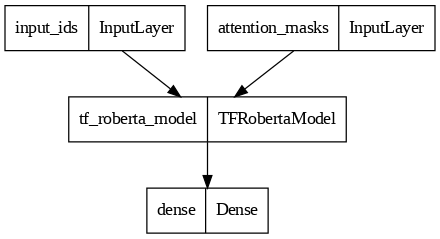

In [13]:
keras.utils.plot_model(ROBERTA_v1, show_shapes = False, show_dtype = False, show_layer_names = True, dpi = 90)

In [14]:
df_compare_v1

text_id                                          full_text  \
121  092BBD374359  "Hey I had fun reading this book with you" , y...   
656  32B2D5592E1D  This teens manual I talk to talk about expecta...   
130  0A1482CD6163  I agree that " A problem is a chance for you t...   
133  0A4CDC286F8C  Imagine if students are trying to accomplish s...   
0    0016926B079C  I think that students would benefit from learn...   
..            ...                                                ...   
59   04B3A4DD9460  I agree that talking to guidence is a good ide...   
176  0D65AF80CDE7  It has been said that first impressions are al...   
449  21EFAE02832D  I believe students should design summer projec...   
55   04788D56AC58  Generic_City is the one place in this world i ...   
641  3134FDB9DB86  Would you like four day of school stay of five...   

     cohesion  syntax  vocabulary  phraseology  grammar  conventions  \
121       3.0     3.0         3.0          3.0      3.5          4.0   
656       2.5     2.0         3.0          2.5      2.0          2.0   
130       4.0     4.0         4.5          4.0      4.5          4.5   
133       2.5     2.5         2.5          3.0      3.0          2.5   
0         3.5     3.5         3.0          3.0      4.0          3.0   
..        ...     ...         ...          ...      ...          ...   
59        3.0     2.5         3.0          3.0      3.0          1.5   
176       2.0     2.5         2.0          2.0      2.5          2.5   
449       2.0     2.0         3.0          3.0      2.0          3.0   
55        3.5     3.0         3.0          3.0      3.5          3.0   
641       3.0     2.5         3.0          2.5      2.0          2.0   

     pred_cohesion  pred_syntax  pred_vocabulary  pred_phraseology  \
121       3.650707     3.500573         3.499491          3.665872   
656       2.563862     2.607243         2.731678          2.640018   
130       3.619630     3.545725         3.621947          3.822901   
133       3.608660     3.243901         3.139135          3.198885   
0         3.311253     3.021276         3.123126          3.061491   
..             ...          ...              ...               ...   
59        3.108329     2.938427         3.168968          3.271232   
176       3.334834     3.174747         3.281576          3.310737   
449       2.646069     2.479709         2.664098          2.453227   
55        3.074354     2.856786         2.872334          2.734375   
641       3.020376     2.840541         3.057518          2.919235   

     pred_grammar  pred_conventions  transformed_pred_cohesion  \
121      3.820677          3.418653                        3.5   
656      2.735522          2.236219                        2.5   
130      3.862290          3.439463                        3.5   
133      3.102656          3.316845                        3.5   
0        2.919690          3.152968                        3.5   
..            ...               ...                        ...   
59       3.365569          2.984943                        3.0   
176      3.354534          3.347417                        3.5   
449      2.487816          2.398774                        2.5   
55       2.722134          2.883787                        3.0   
641      2.753475          2.709869                        3.0   

     transformed_pred_syntax  transformed_pred_vocabulary  \
121                      3.5                          3.5   
656                      2.5                          2.5   
130                      3.5                          3.5   
133                      3.0                          3.0   
0                        3.0                          3.0   
..                       ...                          ...   
59                       3.0                          3.0   
176                      3.0                          3.5   
449                      2.5                          2.5   
55                       3.0        

In [15]:
pred_col_list = ['transformed_pred_' + col for col in label_cols]
MCRMSE(np.array(df_test[label_cols]), np.array(df_pred_v1[pred_col_list]))

0.4946256939087149

In [47]:
pd.set_option('display.max_rows', None)
pd.DataFrame(orig_train_df[label_cols].value_counts())

0
cohesion syntax vocabulary phraseology grammar conventions    
3.0      3.0    3.0        3.0         2.5     3.0          19
3.5      3.5    3.5        3.5         3.5     3.5          17
2.5      2.5    3.0        2.5         2.5     3.0          17
3.0      3.0    3.0        3.0         2.5     2.5          15
2.5      2.5    3.0        3.0         2.5     2.5          15
3.0      3.0    3.0        3.0         3.0     3.5          14
2.5      2.5    3.0        2.5         2.5     2.5          14
3.0      3.0    3.0        3.0         3.0     3.0          14
         2.5    3.0        2.5         2.5     2.5          13
3.5      3.0    3.5        3.5         3.5     3.5          12
                                               3.0          12
         3.5    3.5        3.0         3.0     3.5          12
2.5      2.5    2.5        2.5         2.5     2.5          11
3.0      2.5    3.0        2.5         2.5     3.0          11
3.5      3.0    3.0        3.0         3.0     3.0          11
3.0      3.5    3.5        3.5         3.0     3.5          11
         2.5    3.0        3.0         2.5     2.5          11
3.5      3.0    3.5        3.5         3.0     3.5          11
3.0      2.5    3.0        2.5         2.0     3.0          10
2.5      2.5    3.0        2.5         2.0     2.5          10
                2.5        2.5         2.0     2.0          10
3.5      3.5    3.5        3.5         3.0     3.5          10
3.0      3.0    3.0        3.0         3.0     2.5          10
                                       2.5     3.5          10
2.0      2.0    2.0        2.0         2.0     2.0          10
2.5      3.0    3.0        3.0         3.0     2.5          10
         2.5    3.0        3.0         2.5     3.0           9
2.0      2.0    2.0        2.0         2.0     2.5           9
2.5      3.0    3.0        3.0         2.5     3.0           9
         2.5    3.0        3.0         2.0     2.5           9
3.5      3.5    3.5        3.0         3.5     3.5           9
3.0      2.5    3.0        3.0         2.5     3.0           9
         3.5    3.5        3.5         3.5     3.0           9
3.5      3.5    3.5        3.5         3.5     3.0           9
3.0      3.0    3.0        3.5         3.5     3.0           9
4.0      3.5    4.0        4.0         3.5     3.5           9
3.0      3.5    3.0        3.5         3.5     3.5           9
2.5      2.5    2.5        2.0         2.0     2.0           9
                           2.5         2.0     2.5           8
3.0      3.0    3.0        2.5         2.0     2.5           8
         3.5    3.0        3.0         3.5     3.5           8
2.5      3.0    3.0        2.5         3.0     2.5           8
3.0      3.0    2.5        2.5         2.5     3.0           8
3.5      3.5    3.5        3.5         3.5     4.0           8
         3.0    3.0        3.0         3.5     3.5           8
3.0      3.0    3.0        2.5         2.5     3.0           8
3.5      3.0    3.5        3.0         3.0     3.0           8
2.5      3.0    3.0        2.5         3.0     3.0           8
3.5      3.5    3.5        3.5         4.0     3.0           8
         3.0    3.5        4.0         3.5     3.0           8
2.5      2.0    3.0        2.0         2.5     2.5           8
3.0      3.5    3.0        3.0         3.0     3.5           8
3.5      3.5    4.0        4.0         3.5     3.5           8
2.5      2.0    2.5        2.0         2.0     2.5           8
3.0      2.5    3.0        2.5         2.0     2.5           8
         3.0    3.0        3.5         3.0     3.0           8
3.5      3.5    3.0        3.0         3.5     3.0           8
3.0      3.0    3.0        3.0         3.5     3.0           8
2.5      2.0    3.0        2.5         2.0     2.5           7
3.5      3.5    3.0        3.5         3.5     3.0           7
3.0      3.5    3.5        3.5         3.0     3.0           7
         3.0    3.5        3.5         3.0     3.5           7
3.5      4.0    4.0        4.

# **Clustering**

[0 0 0 ... 2 0 1]
within-cluster SSE: 9444.03


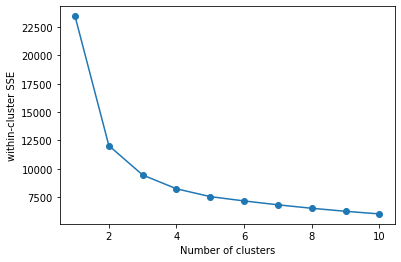

In [56]:
df_rating = copy.deepcopy(orig_train_df[label_cols])
rating_values_array = np.array(df_rating)
# standardize
sc = StandardScaler()
rating_values_array_std = sc.fit(rating_values_array).transform(rating_values_array)

# create an instance of KMeans class using the scikit-learn package
km = KMeans(n_clusters=3,
           init='random',
           #init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

# predict k-means classes
y_km = km.fit_predict(rating_values_array_std)

# print cluster predictions
print(y_km)
print('within-cluster SSE: %.2f' % km.inertia_)
# initialize within-cluster SSE list
wc_SSE = []

# fit KMeans models with different numbers of clusters
for i in range(1, 11):
    km = KMeans(n_clusters=i,           
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=1e-04,
                random_state=0)
    km.fit(rating_values_array_std)
    wc_SSE.append(km.inertia_)
# plot within-cluster SSE for each k
plt.plot(range(1,11), wc_SSE, marker='o');
plt.xlabel('Number of clusters');
plt.ylabel('within-cluster SSE');

We can see that an increase in *k* is associated with a decrease in the within-cluster SSE. 

This is because the examples are closer to the centroid they assigned to.

**The elbow solution**: the optimal *k* is where the within-cluster SSE begings to increase most rapidly.

For this particular example the elbow is at k=5 so we started with a good number of clusters.

## **Silhoutte plots**

A graphical tool to plot a measure of how tightly grouped the examples in the clusters are.

To calculcate the silhoutte coefficient of a single example, apply 3 steps:
- calculate **cluster cohesion**, $a_i$ = average distance between an example, $x_i$, and all other points in the same cluster.
- calculate **cluster separation**, $b_i$, from the next closest cluster = average distance between an example, $x_i$ and all examples in the nearest cluster.
- calculate **the silhouette**, $s_i = \frac{b_i - a_i}{max(b_i,  a_i)}$.


Clustering models with a high silhouette coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

0.385248437126676
Silhouette_score:  0.385248437126676


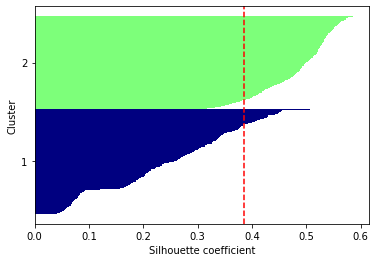

In [92]:
# grab cluster labels and length
km_2 = KMeans(n_clusters=2,
           #init='random',
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

# predict k-means classes
y_km_2 = km_2.fit_predict(rating_values_array_std)

# find silhouette values
print(silhouette_score(rating_values_array_std, y_km_2, metric='euclidean'))
cluster_labels = np.unique(y_km_2)
n_clusters = len(cluster_labels)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    # grab silhouette values for each cluster
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    # plot y and x axes
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
# plot average value across clusters    
silhouette_vals = silhouette_samples(rating_values_array_std, y_km_2, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster');
plt.xlabel('Silhouette coefficient');

# find silhouette values
silhouette_score = silhouette_score(rating_values_array_std, y_km_2, metric='euclidean')
print(f'Silhouette_score: ', silhouette_score)

In [94]:
orig_train_df['rating_cluster'] = y_km_2
orig_train_df

text_id                                          full_text  \
0     0016926B079C  I think that students would benefit from learn...   
1     0022683E9EA5  When a problem is a change you have to let it ...   
2     00299B378633  Dear, Principal  If u change the school policy...   
3     003885A45F42  The best time in life is when you become yours...   
4     0049B1DF5CCC  Small act of kindness can impact in other peop...   
5     004AC288D833  Dear Principal,    Our school should have a co...   
6     005661280443  Imagine if you could prove other people that y...   
7     008DDDDD8E8D  I think it's a good idea for the estudnets to ...   
8     009BCCC61C2A  positive attitude is the key to success. I agr...   
9     009F4E9310CB  Asking more than one person for and advice hel...   
10    00B21F9B726F  Do you think its a good idea for students to c...   
11    00BCADB373EF  A positive attitude is the key to success for ...   
12    00D281524375  Technology allows people to do many things suc...   
13    00ED2563D0B1  Philosopher, physician, and humanitarian Alber...   
14    011AAA636F11  Have you ever solved a math problem in less th...   
15    01350DF42AED  When, the people decide to have a good posture...   
16    01405C3C569D  A positive attitude is the key for be successf...   
17    01501F95B8B2  10pm curfews is a bad idea, why? Because teens...   
18    017802562E71  March 12, 20019  The technology allows people ...   
19    01794F5F1423  Most schools have the same lunch menu every we...   
20    017D2125A1DE  Interducaions  :Summer vacation should be long...   
21    01911AC9674D  Sometimes people have good attitude and a diff...   
22    019BDC9DF7CD  Although some say students will not be benefit...   
23    01A65BA4080E  Most schools let students use their cell phone...   
24    01B3FDB3FD57  Scientist Albert Einstein once said, "Imaginat...   
25    01C53183305A  They are some Schools offer for Students to Le...   
26    0230A077F5B6  some school districts offer programs that allo...   
27    025722D0AFB7  Now a days most employers are looking for spec...   
28    027CB6393714  Hello, my name is Generic_Name and I am a stud...   
29    02B07248077F  I am agree everyone should be make own decisio...   
30    02B36EBD5C66  Students can benefit from this option, but als...   
31    0316F6288791  The new generation of students decide to take ...   
32    032EA4B76BF5  Some people may think that positive attitude i...   
33    036042533396  Do you ever feel like giving up just because y...   
34    0369AD4B5726  I would agree with being honest at all times b...   
35    037C88B5B111  Most of the schools in around the world that c...   
36    037ED3EA2982  Do you think positive attitude is the key to s...   
37    0381BBE47393  Thomas Jefferson wrote, "Determine never to be...   
38    0383E4A36E46  If I could go to visit anywhere in the world, ...   
39    03844422EA75  my name is Generic_Name and my story is about ...   
40    038480498E5A  Dear Principal,    I think that it is a great ...   
41    03A3B40D651B  One of the smartest people on earth said that ...   
42    03C9E7A15C42  I think that what  Auther ralph waldo wrote i ...   
43    03CB73341E0E  Do you think its a good idea to have somone ma...   
44    03CC97D3747E  Many schools have partner ships with companies...   
45    03D00899C901  I think yes, that if you have a positive attit...   
46    03F7CF142B70  many people say that True self-esstem does com...   
47    0420DDE0BABD  I agree, because you threw failure to be succe...   
48    0435196871A1  We live in a world where almost everyone has d...   
49    043B9F48FDC2  Should all the students have to take a music, ...   
50    04491B61A791  I went to visit the manager of the Amazon comp...   
51    0465517EB6B7  First impression is an effect a feeling, a fee...   
52    04659704890C  Having a good attitude is important if we want...   
53    046C6FB91CBA  Distance learning can be very helpful to stude...

In [85]:
orig_train_df[orig_train_df.rating_cluster == 0]

text_id                                          full_text  \
3570  F1933BF43F45  I agree with this idea and I think it's a good...   
2470  B7AABB24BDB8  Yes,we accomplish more if we are always doing ...   
3903  FFA6690BC309  Having activities after school are good ideas ...   
10    00B21F9B726F  Do you think its a good idea for students to c...   
3852  FDCBCA9B0636  Dear School Principal,\r\n\r\nI believe that s...   
3160  DE921CECE21A  Do we accomplish more by constantly doing some...   
3353  E7EFD51B632F  The most persuasive, efficient way to influenc...   
3335  E71EFBE547CF  Everyone has a talent or skill. Everyone can d...   
3407  EA105A8B8699  I agree because in life you can achieve many g...   
942   48292985CC59  Well I want to start saying that the first imp...   
754   39F578D9212E  An enjoyable place where you can go spend time...   
3147  DDD3771E1DF6  Many people believe that they do not need advi...   
338   194E86ED4117  My dad usually told me that failure is the mot...   
857   41DF6D292056  In this essay we are going to discuss the vari...   
3727  F8776FDF7DC0  Have you ever thought about what to bring on a...   
3658  F5B510BCCA2D  Enjoyable activity is a good thing when it com...   
1828  89ADE1CC1BEC  In my opinion, students should not use their p...   
1957  93C575DB7931  Would you rather ask one person or multiple fo...   
1298  63AB55DADABF  Do you think we should extend our school day? ...   
856   41D9F5D10332  I believe that students accomplish more when t...   
2440  B54DBEF87F11  One day Generic_Namehad to go somewhere import...   
3524  EFDAD69E103B  I have being asked to explain the effects of a...   
2857  CF7AF5FA5DDC  Some people say that having a positive attitud...   
1465  71131D46F019  Some schools use cell phones in the classroom ...   
982   4B174612FD60  Imagine oneself is a student in high school wh...   
1153  5923F6631724  ' Why do we have to go school for eight and a ...   
37    0381BBE47393  Thomas Jefferson wrote, "Determine never to be...   
1781  86BB790A5875  The more the better ! Getting Advice from many...   
1288  62E5030D1A59  Imagine getting a job that you're most interes...   
2171  A22BC15DDB95  To conserve energy and resources, some busines...   
3522  EFD563DFAC60  Although some people might say that students s...   
2934  D3291B198D36  Generic_Name\n\nGrade: 12\n\nTeacher: Generic_...   
819   3F3DC123EDF6  Do curfews keep teenagers out of trouble, or d...   
1793  8773AAFA4355  Have you ever wondered what it would feel like...   
3707  F7CBE1D11BF8  Is true self-esteem caused by self-confidence ...   
3576  F1B4090C8B06  If you challenge yourself, you will never beco...   
1805  880188B5EED8  People say first impressions are almost imposs...   
3125  DCDED7261D03  "Your character will be what yourself choose t...   
1045  4FD4CE18CCDF  I think seeking multiple opinions would be bet...   
2679  C5FF203DE2DE  I used my sowing to help me with having a choi...   
261   12FE853D6B88  I agree with Emerson's statement because peopl...   
19    01794F5F1423  Most schools have the same lunch menu every we...   
2748  CA290993DFBA  Many students and teachers think that taking o...   
2385  B110268BBFEC  Albert Schweitzer the philosopher,physician, a...   
2543  BCF16DEB277E  Many people can set a good example by the way ...   
2421  B3F0F2F6487F  should the school extend the school day two ho...   
3813  FBE8983EF69C  Have you ever participated in a extracurricula...   
1535  760988C4BA3B  In the future, I hope that one day I will win ...   
3828  FC9DA73D1EA0  Even in classroom everything catch student's a...   
3255  E2C3F26AB94D  Something I'd like to accomplish in the future...   
1565  77FAA33476CA  Why does most people want multiple advice when...   
1437  6E3D46F9AAE1  It is true that as soon as you stop learning, ...   
1701  80F044EBC71B  I chose the lesson math for elementary school ...   
2685  C652190DB53F  Working alone is more beneficial than working ...

In [86]:
orig_train_df[orig_train_df.rating_cluster == 1]

text_id                                          full_text  \
1960  93EF5F755313  To who may concern.\n\nThe Former British Prim...   
52    04659704890C  Having a good attitude is important if we want...   
3081  DAF9AC30424E  The school day should not be extended even mor...   
2738  C972C565A819  Do you want to see a temple made with gold? I ...   
778   3C56844D4CF0  Many students become involved in extracurricul...   
494   2567C158F746  If we are making good choses life can be more ...   
1324  6586DF43A92D  I agree with British Prime Minister Winston Ch...   
1368  6932E62C6338  Thomas Jefferson was a president, and he wrote...   
2467  B7938A92A4F9  Thomas Jefferson wrote, "Determine never to be...   
3362  E8445DB18983  Scientist Albert Eisnste sad " imagination is ...   
2911  D23D870D5333  Technology allows people to complete many task...   
2433  B4B8BEB77C2E  One topic that is frequently debated is about ...   
2922  D2C7BE42DEF6  Do you think it is a good idea for students to...   
3628  F4B3B2CAB030  I belief in this issue about the students are ...   
3045  D99C71A15BA0  Society said that the first impression are alm...   
3427  EB1500B8EA75  Some students who live far away from their sch...   
129   0A082DA0A890  I agree with student taking online classes. Be...   
2897  D190133EDD2B  Dear council\n\nI think the city council shoul...   
922   46E550A148DF  Thomas Jefferson wrote that "Determine never t...   
231   10E11F30F47C  Technology allows people to complete many task...   
2819  CDABA09822C7  I my opinion the Minister Winston Churchill it...   
3676  F66B2BAB7E4C  Do we choose our own behavior or is it control...   
1872  8D0B6FE098F1  Should students take the programs that the sch...   
3827  FC86782120D3  I would do better thing that will push me ahea...   
2200  A403FC7A8542  In the world , nobody is more than another , h...   
1961  940441D4CF9C  Someone the has share wisdom, and experience t...   
3204  E0BABC4506D0  What are some decision that students take rega...   
3181  DF9E11F7A06E  Ralph Waldo Emerson says"unless you try to do ...   
3821  FC36DBAE640B  An old proverb says honesty is the best policy...   
2243  A7CEC076632B  Technology\n\nTechnology does not effect the w...   
548   29E1FB4B1D42  1. R- Teacher\n\nA- student\n\nT - about helpi...   
3358  E81B50098AAC  In my opinion students should come to school. ...   
3863  FE4E3BB2DAE1  People really work on this this? or People kno...   
2437  B5106AB5C81C  To conserve energy and resources, some busines...   
3201  E0A8EBEE657B  First impressions are almost impossible to cha...   
2612  C1C75CB3BB17  Dear Principal,\n\nI'm against for having a gr...   
2801  CCB13E22A439  Technology allows to the people, technology th...   
1754  84CE7281265F  My uncle has in his wallet 100 dollars, he giv...   
1113  56080A912BB5  Generic_Name writing sol march 19, 2019\n\nIf ...   
2215  A50D4A87B19D  I agree with this statement because people can...   
1381  6A7F75AD2ADE  The students would benefit from being able to ...   
3308  E545B850725F  Although some say extracurricular activities a...   
163   0C7D385D812A  How should people take decisions?? thats the r...   
590   2C94D8BCF2F9  How can we judge a person without know that pe...   
1742  83F57096AF9C  Be a master in any area is something really aw...   
2161  A1976FDEA9E2  If I would pick a enjoyable activity it would ...   
1439  6E70CECCE25D  One topic is frequetly debated is whether or n...   
1720  827D807512AB  churchill's statement about the important role...   
2414  B379CB700CCD  Technology is making people's lives easier, be...   
3824  FC723537E49B  Positive attitude is the key to succsuss in yo...   
667   33CFC6838E04  Dear: Generic_Name\n\nI agree for the possitiv...   
1607  7A7660BBEE86  The greats benefits to work with a group\n\nTo...   
2307  ABFEE879153D  I believe that graduating high school in three...   
141   0AF4F757FBEA  The use of technology had positive effect's on...

Cluster ID 0 denotes the records where at least one KPI has score 4 or more and clsuter ID 1 denotes the records where atleasst one of the KPI has 3 or below scores.

In [109]:
df_cluster0 = orig_train_df[orig_train_df.rating_cluster == 0]
df_cluster1 = orig_train_df[orig_train_df.rating_cluster == 1]

In [112]:
print(f"Length of cluster 0 : {len(df_cluster0)} and length of cluster 1 : {len(df_cluster1)}")

Length of cluster 0 : 1915 and length of cluster 1 : 1996


## **Validating the cluster assignment**

In [113]:
np.max(df_cluster0), np.min(df_cluster0)

(text_id                                                FFE16D704B16
 full_text         ~Aesop said: "  No act of kindness, no matter ...
 cohesion                                                        5.0
 syntax                                                          5.0
 vocabulary                                                      5.0
 phraseology                                                     5.0
 grammar                                                         5.0
 conventions                                                     5.0
 rating_cluster                                                    0
 dtype: object,
 text_id                                                00299B378633
 full_text         !!Ops Ops!!  Technology allow people to comple...
 cohesion                                                        1.0
 syntax                                                          1.0
 vocabulary                                                      1.0
 phraseology      

In [105]:
df_cluster0_anomaly = orig_train_df[(orig_train_df.rating_cluster == 0) & ((orig_train_df.cohesion <= 3) & (orig_train_df.syntax <= 3) & (orig_train_df.vocabulary <= 3) & (orig_train_df.phraseology <= 3) & (orig_train_df.grammar <= 3) & (orig_train_df.conventions <= 3))]
df_cluster0_anomaly.head()

text_id                                          full_text  cohesion  \
7   008DDDDD8E8D  I think it's a good idea for the estudnets to ...       2.5   
21  01911AC9674D  Sometimes people have good attitude and a diff...       2.0   
22  019BDC9DF7CD  Although some say students will not be benefit...       3.0   
25  01C53183305A  They are some Schools offer for Students to Le...       2.0   
26  0230A077F5B6  some school districts offer programs that allo...       3.0   

    syntax  vocabulary  phraseology  grammar  conventions  rating_cluster  
7      2.5         2.5          2.5      2.5          2.0               0  
21     2.5         2.5          2.0      2.0          2.5               0  
22     3.0         3.0          3.0      2.5          3.0               0  
25     2.0         2.5          2.0      3.0          2.0               0  
26     2.5         2.5          2.5      2.0          2.5               0

In [106]:
len(df_cluster0_anomaly)

644

In [114]:
np.max(df_cluster1), np.min(df_cluster1)

(text_id                                                FFED00D6E0BD
 full_text         yes, I am agree with that ..  Because it's tru...
 cohesion                                                        5.0
 syntax                                                          5.0
 vocabulary                                                      5.0
 phraseology                                                     5.0
 grammar                                                         5.0
 conventions                                                     5.0
 rating_cluster                                                    1
 dtype: object,
 text_id                                                0016926B079C
 full_text         " Determine never to be idle... It is wonderfu...
 cohesion                                                        1.0
 syntax                                                          1.0
 vocabulary                                                      1.5
 phraseology      

In [115]:
df_cluster1_anomaly = orig_train_df[(orig_train_df.rating_cluster == 1) & ((orig_train_df.cohesion >= 3) & (orig_train_df.syntax >= 3) & (orig_train_df.vocabulary >= 3) & (orig_train_df.phraseology >= 3) & (orig_train_df.grammar >= 3) & (orig_train_df.conventions >= 3))]
df_cluster1_anomaly.head()

text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
3  003885A45F42  The best time in life is when you become yours...       4.5   
5  004AC288D833  Dear Principal,    Our school should have a co...       3.5   
6  005661280443  Imagine if you could prove other people that y...       3.5   
8  009BCCC61C2A  positive attitude is the key to success. I agr...       3.0   

   syntax  vocabulary  phraseology  grammar  conventions  rating_cluster  
0     3.5         3.0          3.0      4.0          3.0               1  
3     4.5         4.5          4.5      4.0          5.0               1  
5     4.0         4.0          3.5      3.5          4.0               1  
6     4.0         3.5          3.5      4.0          4.0               1  
8     3.0         3.5          3.5      3.0          3.0               1

In [155]:
lst = [0,2,4]
df_cluster1_anomaly.iloc[lst]

text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
5  004AC288D833  Dear Principal,    Our school should have a co...       3.5   
8  009BCCC61C2A  positive attitude is the key to success. I agr...       3.0   

   syntax  vocabulary  phraseology  grammar  conventions  rating_cluster  
0     3.5         3.0          3.0      4.0          3.0               0  
5     4.0         4.0          3.5      3.5          4.0               0  
8     3.0         3.5          3.5      3.0          3.0               0

In [108]:
len(df_cluster1_anomaly)

899

In [129]:
len(df_cluster0) , len(df_cluster0_anomaly), len(df_cluster0) - len(df_cluster0_anomaly)

(1915, 644, 1271)

In [135]:
len(df_cluster1) , len(df_cluster1_anomaly), len(df_cluster1) - len(df_cluster1_anomaly)

(1996, 899, 1097)

In [116]:
len(df_cluster0) - len(df_cluster0_anomaly) + len(df_cluster1_anomaly)

2170

In [117]:
len(df_cluster1) - len(df_cluster1_anomaly) + len(df_cluster0_anomaly)

1741

In [120]:
df_cluster1_anomaly['rating_cluster'] = 0
df_cluster0_anomaly['rating_cluster'] = 1

In [133]:
combined = df_cluster0.append(df_cluster0_anomaly)
df_cluster0_excpt_cluster0_anomaly = combined[~combined.index.duplicated(keep = False)]

combined = df_cluster1.append(df_cluster1_anomaly)
df_cluster1_excpt_cluster1_anomaly = combined[~combined.index.duplicated(keep = False)]

In [134]:
len(df_cluster0_excpt_cluster0_anomaly), len(df_cluster1_excpt_cluster1_anomaly)

(1271, 1097)

In [138]:
new_df_cluster0 = pd.concat([df_cluster0_excpt_cluster0_anomaly, df_cluster1_anomaly])
new_df_cluster1 = pd.concat([df_cluster1_excpt_cluster1_anomaly, df_cluster0_anomaly])

In [139]:
len(new_df_cluster0), len(new_df_cluster1)

(2170, 1741)

We take the initial input set and split into train and test set with 8:2 ratio.
The train part is then going thru k fold cross validation and get tested on validation set.

In [ ]:
shuffle = np.random.permutation(np.arange(orig_train_df.shape[0]))
orig_train_df = orig_train_df.iloc[shuffle]
split=(0.8, 0.2)
splits = np.multiply(len(orig_train_df), split).astype(int)
df_train, df_test = orig_train_df[ : splits[0]], orig_train_df[splits[0] : ]

label_cols = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
y_test = np.array(df_test[label_cols], dtype = "float32")

MCRMSE_list = []
KPI_list = []

for kfold, (train_indices, val_indices) in enumerate(StratifiedKFold(n_splits =  2,#number_of_splits, 
                                                                     shuffle = True, 
                                                                     random_state = random_state
                                                                     ).split(df_train['rating_cluster'].values.tolist(), 
                                                                             df_train['rating_cluster'].values.tolist()
                                                                            )
                                                     ):
        print(f"k-fold : {kfold + 1}, length of train data : {len(train_indices)}, length of validation data : {len(val_indices)}")
        #print(type(list(train_indices)))
        #print(train_indices)
        #print(val_indices)
        
        roberta_tokenizer = RobertaTokenizer.from_pretrained(ROBERTA_MODEL)
        roberta_model = TFRobertaModel.from_pretrained(ROBERTA_MODEL)

        train_input_ids, train_attention_masks = text_encode(df_train.iloc[list(train_indices)]['full_text'], roberta_tokenizer, MAX_LEN)
        y_train = np.array(df_train.iloc[list(train_indices)][label_cols], dtype = "float32")
        val_input_ids, val_attention_masks = text_encode(df_train.iloc[list(val_indices)]['full_text'], roberta_tokenizer, MAX_LEN)
        test_input_ids, test_attention_masks = text_encode(df_test['full_text'], roberta_tokenizer, MAX_LEN)

        loss = tf.keras.losses.mse
        metrics = tf.keras.metrics.mse

        ROBERTA_v1 = build_base_model(roberta_model, learning_rate = learning_rate)
        ROBERTA_v1.summary()

        history_v1 = ROBERTA_v1.fit((train_input_ids, train_attention_masks),
                                     y_train,
                                     validation_data=(val_input_ids, val_attention_masks), 
                                     batch_size = batch_size,        
                                     epochs = 2
                                     #,validation_split = validation_split
                                   )

        history_v1_df = pd.DataFrame(history_v1.history)
        print(history_v1_df.T)

        score_v1 = ROBERTA_v1.evaluate([test_input_ids, test_attention_masks], 
                                       y_test
                                      ) 
        print(pd.DataFrame(score_v1))

        predictions_v1 = ROBERTA_v1.predict([test_input_ids, test_attention_masks])
        df_pred_v1 = pd.DataFrame(predictions_v1, columns=['pred_' + c for c in label_cols])
        for col in label_cols:
            df_pred_v1['transformed_pred_' + col] = df_pred_v1['pred_' + col].apply(lambda x : roundPartial(x, .5))
        df_compare_v1= pd.merge(df_test, df_pred_v1, left_index = True, right_index = True)
        keras.utils.plot_model(ROBERTA_v1, show_shapes = False, show_dtype = False, show_layer_names = True, dpi = 90)
        pred_col_list = ['transformed_pred_' + col for col in label_cols]
        MCRMSE_val = MCRMSE(np.array(df_test[label_cols]), np.array(df_pred_v1[pred_col_list]))
        print(MCRMSE_val)
        MCRMSE_list.append((kfold + 1, MCRMSE_val))
        custom_plot(history_v1_df, 'mean_square_error', 'MSE')
        

k-fold : 1, length of train data : 1564, length of validation data : 1564
